# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("../data-preprocessing-workflow/data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,NoGar,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

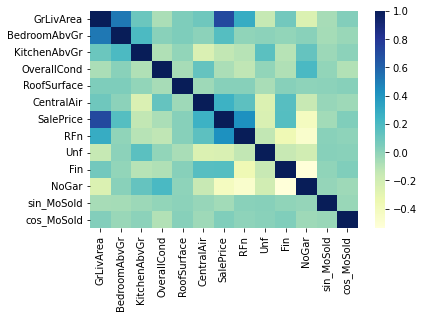

In [2]:
import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

❓ Visualize the correlation between column pairs in a dataframe ❓

In [3]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,RFn,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [4]:
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,RFn,0.419678


In [5]:
correlated_features = 0

🧪 **Test your code**

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [7]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,NoGar,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


In [8]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                       bins=[data['SalePrice'].min()-1,
                             data['SalePrice'].mean(),
                             data['SalePrice'].max()+1], 
                       labels=['cheap','expensive'])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,NoGar,sin_MoSold,cos_MoSold,SalePriceBinary
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01,expensive
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01,expensive
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16,expensive
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01,cheap
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00,expensive


In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

target_encoder = LabelEncoder().fit(data['SalePriceBinary']) # Fit target encoder
target_encoder



LabelEncoder()

In [10]:
# y1 = target_encoder.transform(data['SalePriceBinary']) # Encode target
y = data['SalePrice']

In [14]:


X = data.drop(columns=['SalePrice', 'SalePriceBinary'])# Create feature set
X_scaled = MinMaxScaler().fit_transform(X) # Scale the features

lin_model = LinearRegression() # Instanciate model
base_model_score = cross_val_score(lin_model, X_scaled, y, cv=10) # Cross validate

base_model_score.mean()


0.6463121237013001

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [15]:
base_model_score = base_model_score.mean()

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [ ]:
lin_model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(lin_model, X, y, n_repeats=10) # Perform Permutation

In [ ]:
X.columns

In [ ]:
permutation_score.importances_mean

In [ ]:
features_import= pd.DataFrame(permutation_score.importances_mean, X.columns).reset_index()

In [ ]:
features_import.columns=['feature','score decrease']
features_import.sort_values(by='score decrease', ascending=False, inplace = True )

In [ ]:
features_import

In [13]:
import numpy as np
from sklearn.inspection import permutation_importance

log_model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,1.042728
1,BedroomAbvGr,0.065179
6,RFn,0.053159
9,NoGar,0.019813
2,KitchenAbvGr,0.019716
5,CentralAir,0.015821
7,Unf,0.013922
8,Fin,0.01134
10,sin_MoSold,0.000568
3,OverallCond,0.000345


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [ ]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

In [17]:
importance_df_new = importance_df.drop(importance_df[(importance_df['score decrease'] <0.01)].index)
importance_df_new

,feature,score decrease
0,GrLivArea,1.042728
1,BedroomAbvGr,0.065179
2,KitchenAbvGr,0.019716
5,CentralAir,0.015821
6,RFn,0.053159
7,Unf,0.013922
8,Fin,0.01134
9,NoGar,0.019813


In [46]:
importance_df_new['feature'].values.tolist()

['GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'CentralAir',
 'RFn',
 'Unf',
 'Fin',
 'NoGar']

In [47]:
X = data[['GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'CentralAir',
 'RFn',
 'Unf',
 'Fin',
 'NoGar']]
X

,GrLivArea,BedroomAbvGr,KitchenAbvGr,CentralAir,RFn,Unf,Fin,NoGar
0,0.380070,0.375,0.333333,1.0,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,1.0,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,1.0,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,1.0,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,1.0,0.0,0.0,1.0,0.0
1456,0.940904,0.375,0.333333,1.0,0.0,0.0,0.0,1.0
1457,1.353418,0.500,0.333333,1.0,0.0,0.0,1.0,0.0
1458,-0.596369,0.250,0.333333,1.0,0.0,0.0,0.0,1.0


In [49]:

X_scaled = MinMaxScaler().fit_transform(X) # Scale the features

lin_model = LinearRegression() # Instanciate model
simplified_model = cross_val_score(lin_model, X_scaled, y, cv=10) # Cross validate

simplified_model.mean()

0.6477133841888609

In [50]:
simplified_model_score = simplified_model.mean()

🧪 **Test your code**

In [51]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!